# Data Exploration

## Understanding our data

#### Import and load

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('creditcard.csv')
df_modified = df.copy()

#### Basic info

In [3]:
# Basic info
print(df.shape)
print(df.head(5))
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df['Class'].value_counts())
print(df.columns)


(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

#### Duplicates

In [4]:
# Save both observations duplicated of the dataset
df_duplicated = df[df.duplicated(keep=False)]
print(df_duplicated.shape)

df_duplicated.head(4)

(1854, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0


In [5]:
# Inplace will modify the dataframe and not creating another one
def del_duplicated(df):
    df.drop_duplicates(inplace=True)
    return df

In [6]:
df_modified = del_duplicated(df_modified)

#### Visualization of distributions

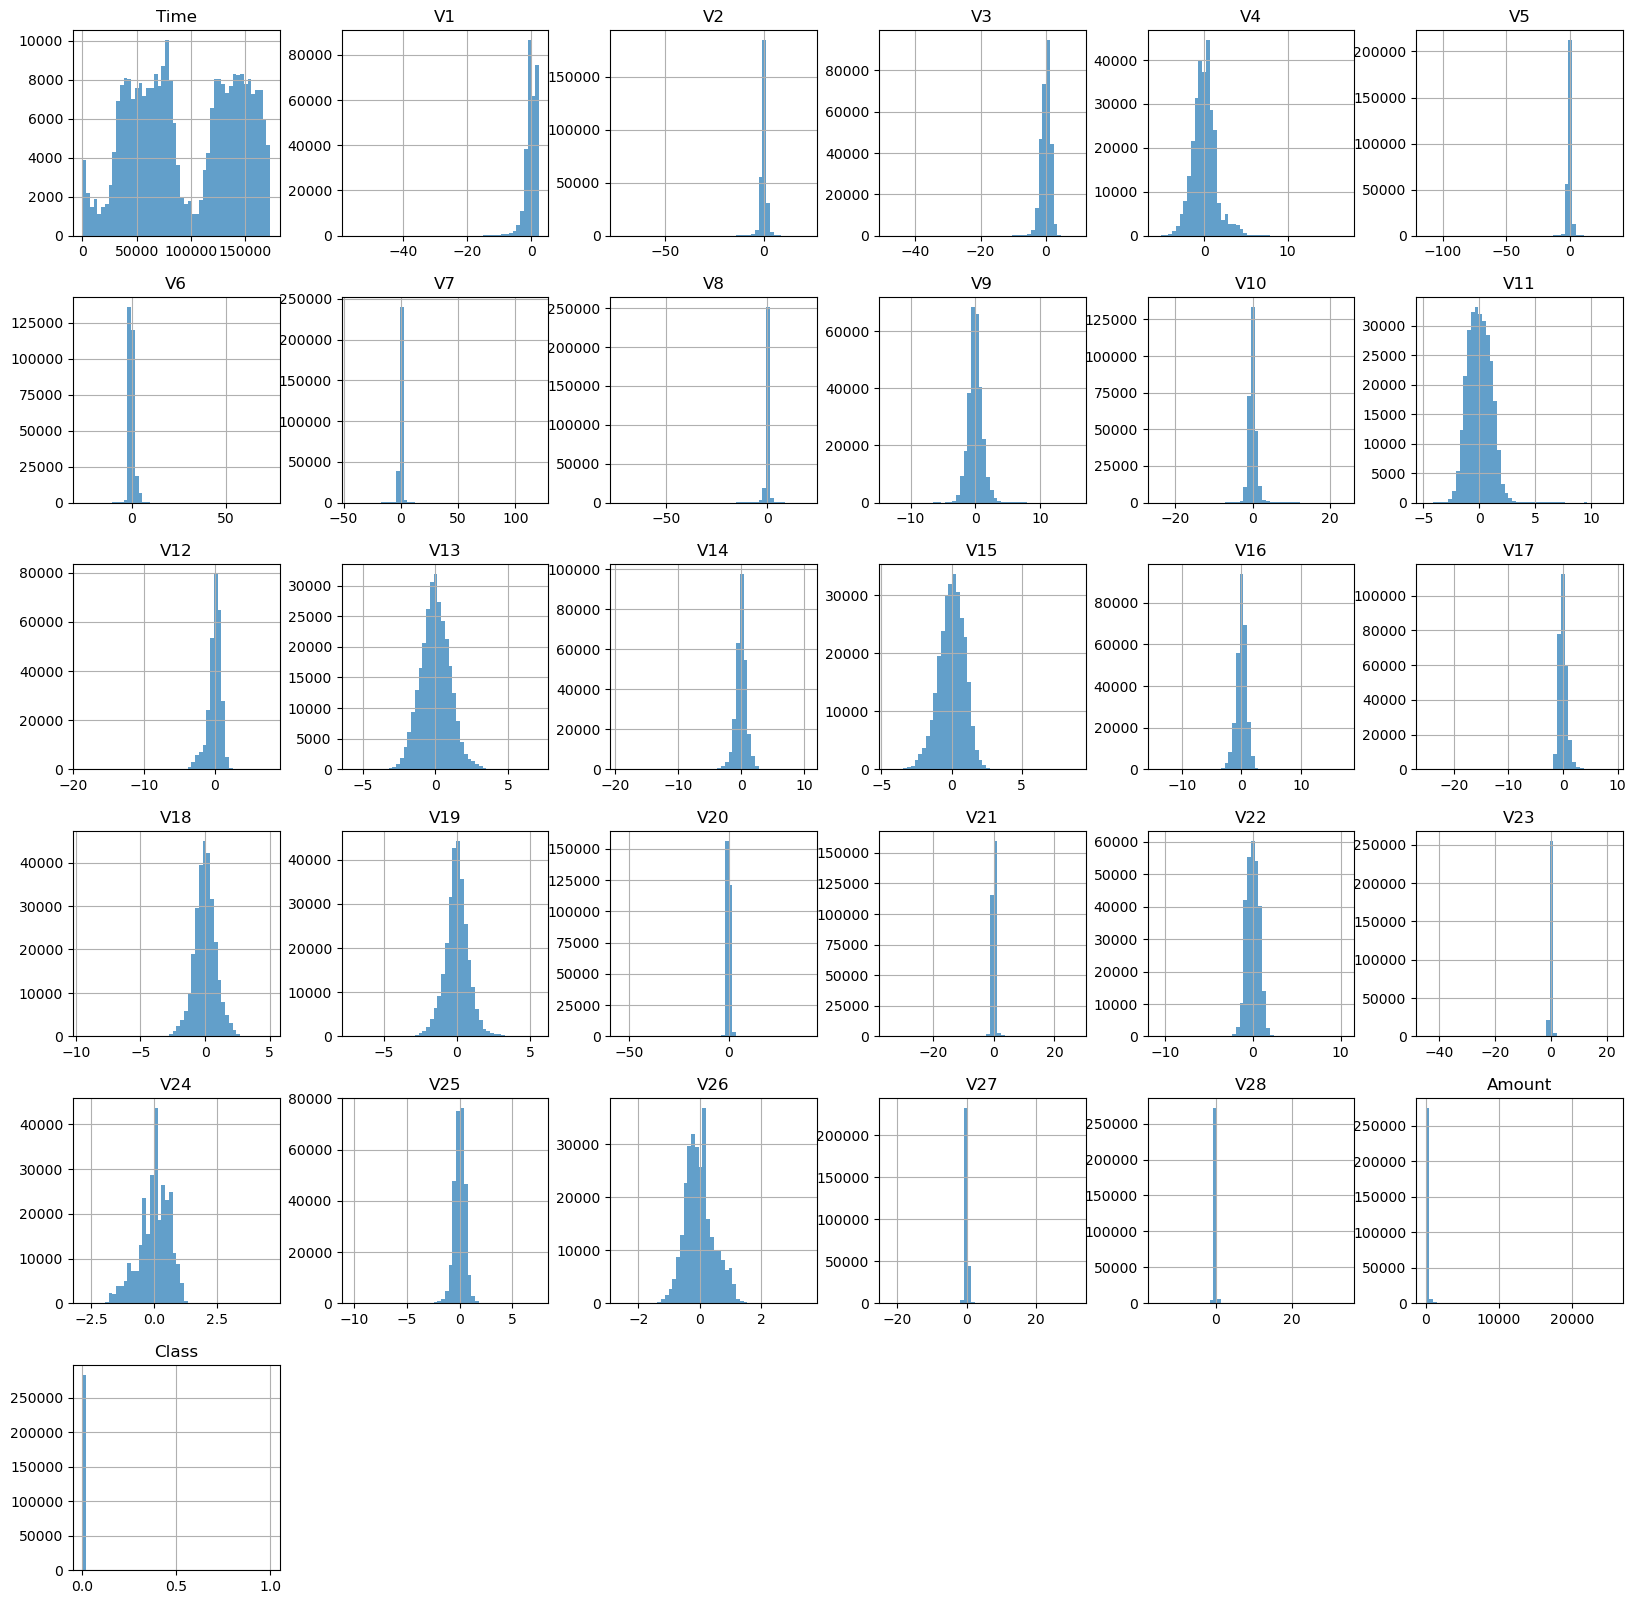

In [7]:
# Plot of histogram
# x: features values
# y: frequency 
df_modified.hist(figsize=(20,20), bins=50, alpha=0.7)
plt.show()

In [8]:
# Determine number of fraud cases in dataset

Fraud = df_modified[df_modified['Class'] == 1]
Valid = df_modified[df_modified['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))


0.0016698852262818046
Fraud Cases: 473
Valid Cases: 283253


#### Missing and Nan values

In [9]:
# Missing values
print(sum(df_modified.isnull().sum()))

# NaN values
print(sum(df_modified.isna().sum()))

0
0


#### Class balance visualization

C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\178182079.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df_modified['Class'], sort=True)


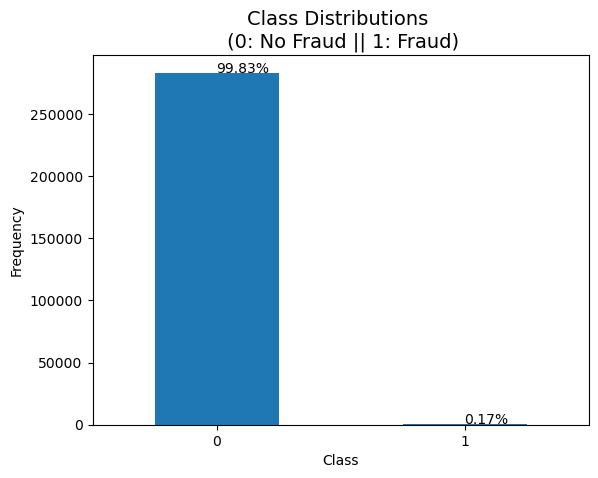

In [10]:
# Visualizing the class distribution with percentage on top of the bars

count_classes = pd.value_counts(df_modified['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.xticks(range(2))
plt.xlabel('Class')
plt.ylabel('Frequency')

for index, value in enumerate(count_classes):
    plt.text(index, value, str(round((value/len(df_modified['Class']))*100, 2))+'%')
plt.show()


#### Basic info of transactions

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

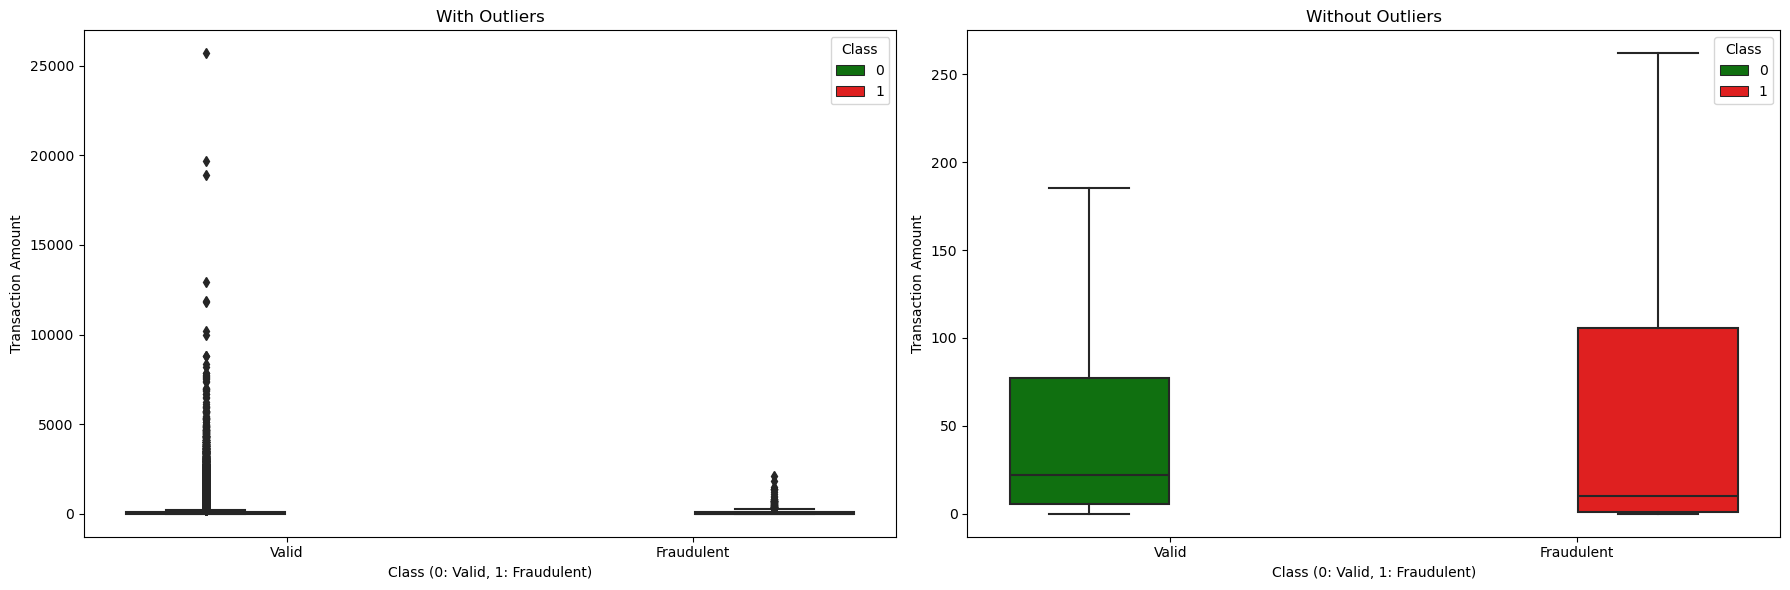

In [11]:
# mean amount of money per transaction by fraudulent transactions
print(Fraud.Amount.describe())
print(Valid.Amount.describe())

# Boxplot outliers and whiskers 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=True)
ax1.set_title('With Outliers')
ax1.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax1.set_ylabel('Transaction Amount')
ax1.set_xticklabels(['Valid', 'Fraudulent'])

sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=df_modified, palette={1: 'red', 0: 'green'}, showfliers=False)
ax2.set_title('Without Outliers')
ax2.set_xlabel('Class (0: Valid, 1: Fraudulent)')
ax2.set_ylabel('Transaction Amount')
ax2.set_xticklabels(['Valid', 'Fraudulent'])

plt.tight_layout()
plt.show()




#### Correlation matrix - before sampling data

In [12]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Shuffle the data before creating the subsamples

df_modified = df_modified.sample(frac=1)

# Get the fraud transactions
_fraud_df = df_modified[df_modified['Class'] == 1]

# Get the number of fraud transactions
num_fraud = len(_fraud_df)
print(num_fraud)

# Extract an equal number of non-fraud transactions
_non_fraud_df = df_modified[df_modified['Class'] == 0].iloc[:num_fraud]

normal_distributed_df = pd.concat([_fraud_df, _non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

473


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77348,57007.0,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,...,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01,1
152019,96717.0,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,...,-5.498772,2.941475,0.916236,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,1.00,1
53709,46112.0,1.224139,0.620838,-0.373582,1.103885,0.289225,-0.648562,0.198137,-0.082933,-0.342213,...,-0.023489,-0.022252,-0.181381,-0.157027,0.718744,-0.321775,0.028753,0.037563,1.00,0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
10568,17520.0,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1


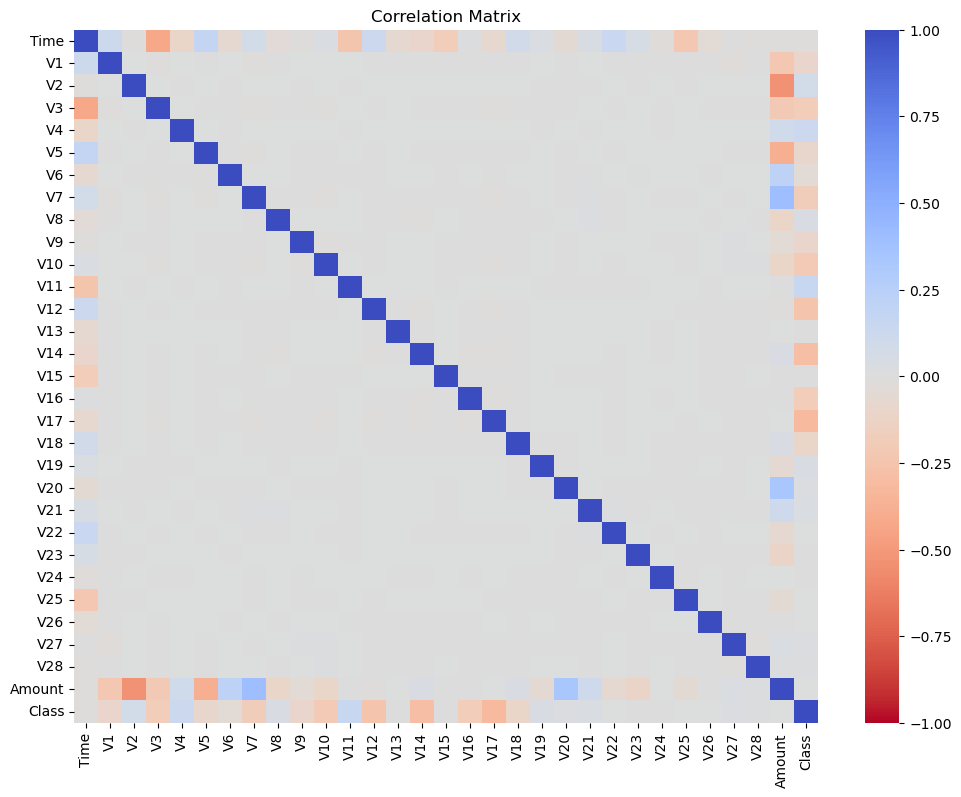

In [13]:
# Correlation Matrix
corrmat = df_modified.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()
# 

PCA (Principal Component Analysis) is a dimensionality reduction method that transforms features into orthogonal components. As a result, the transformed features (principal components) are uncorrelated with each other. Therefore, for the PCA-derived features (V1, V2, ... V28), a correlation matrix would show little to no correlation between them.
However, it's still valuable to check the correlation of non-PCA features (Time and Amount) with the target variable (Class). This can help determine if there's any relationship between these features and the probability of a transaction being fraudulent.

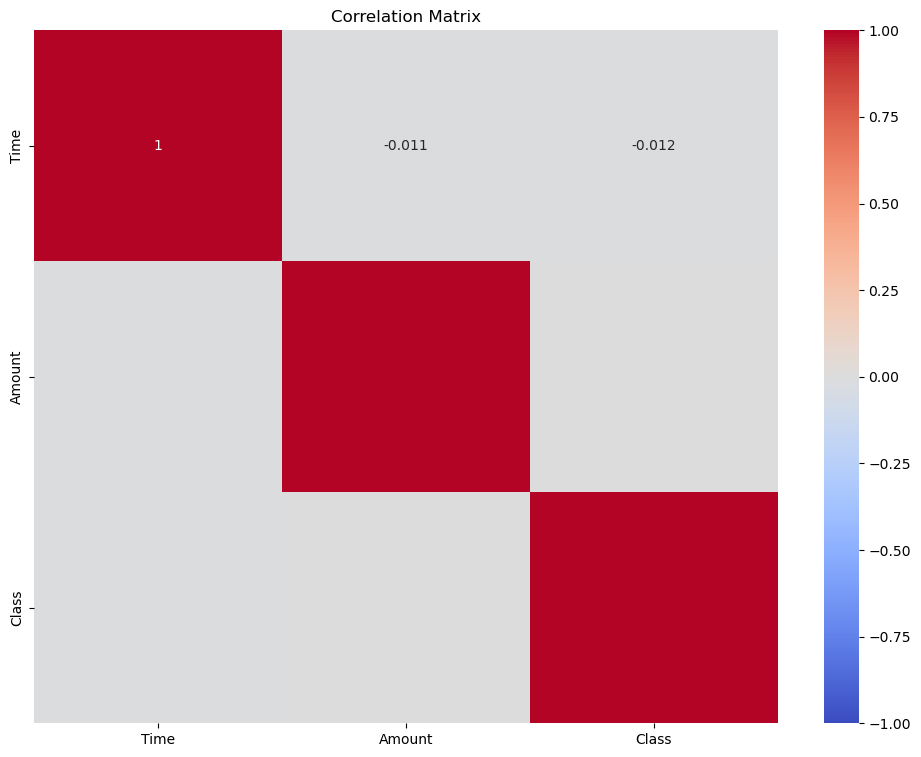

In [14]:
# Correlation Matrix between only Time, Amount and Class with values inside the graph
corrmat = df_modified[['Time', 'Amount', 'Class']].corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



In [15]:
def plot_top_correlated_features(df, class_name, n_features=4):
    """
    Plot the top n features most correlated with the specified class.
    
    Parameters:
    - df: DataFrame with the data.
    - class_name: Name of the class to compute correlations.
    - n_features: Number of top features to plot (default is 4).
    """
    # Calculate correlation of each feature with the specified class
    feature_correlations = df.corr()[class_name].sort_values(ascending=False)

    # Selecting the top features excluding the specified class
    top_features = feature_correlations.iloc[1:n_features+1].index.tolist()

    # Extracting correlation values for these top features
    top_corr_values = feature_correlations[top_features]

    # Plotting the horizontal line graph
    plt.figure(figsize=(12, 7))
    top_corr_values.plot(kind='barh', color='skyblue')
    plt.title(f'Correlation of Top Features with {class_name}')
    plt.xlabel('Correlation Value')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  # To display the highest correlated feature at the top
    plt.show()

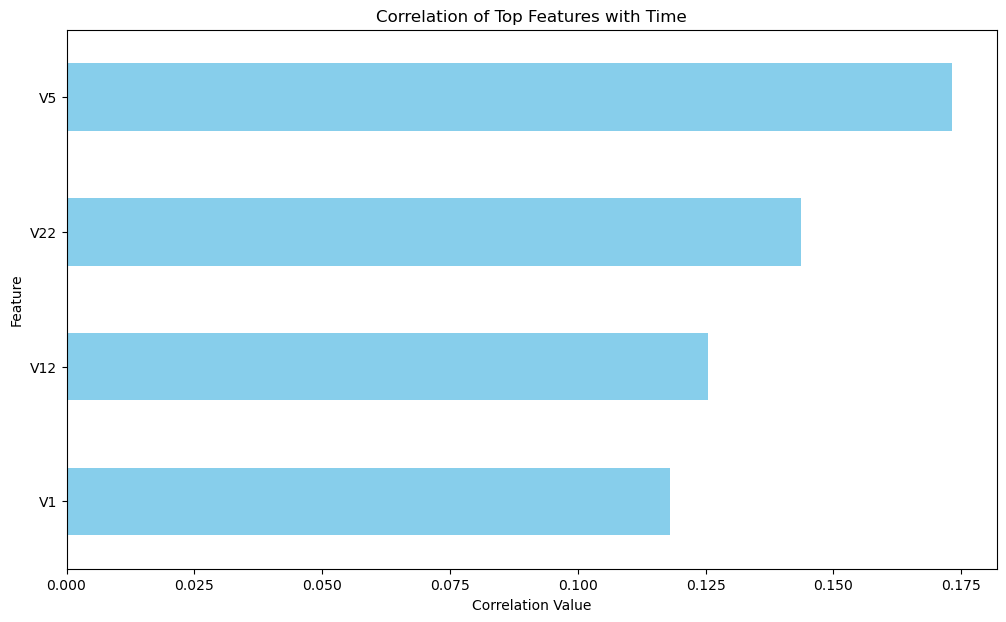

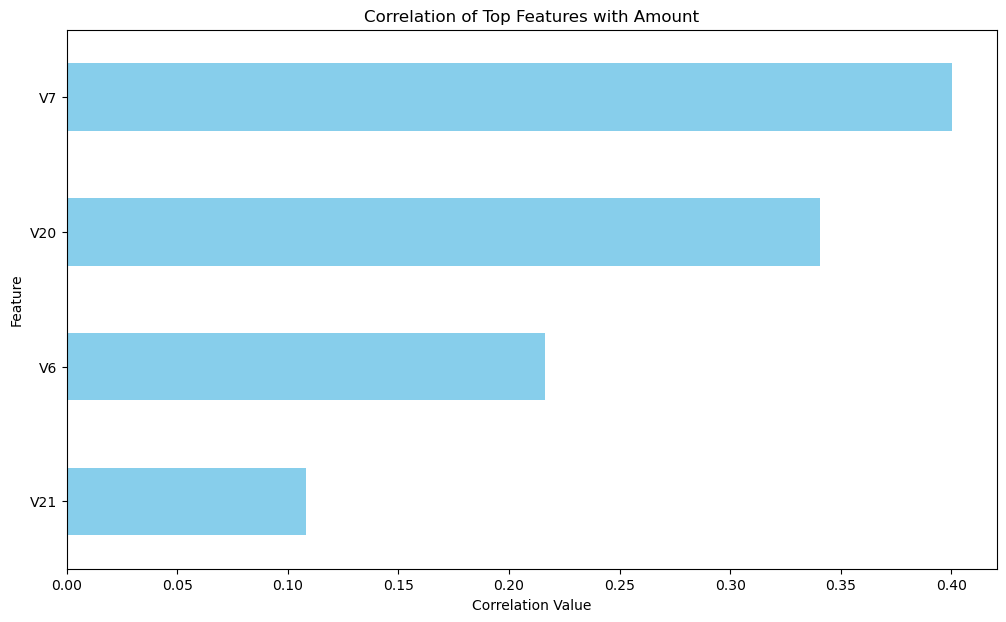

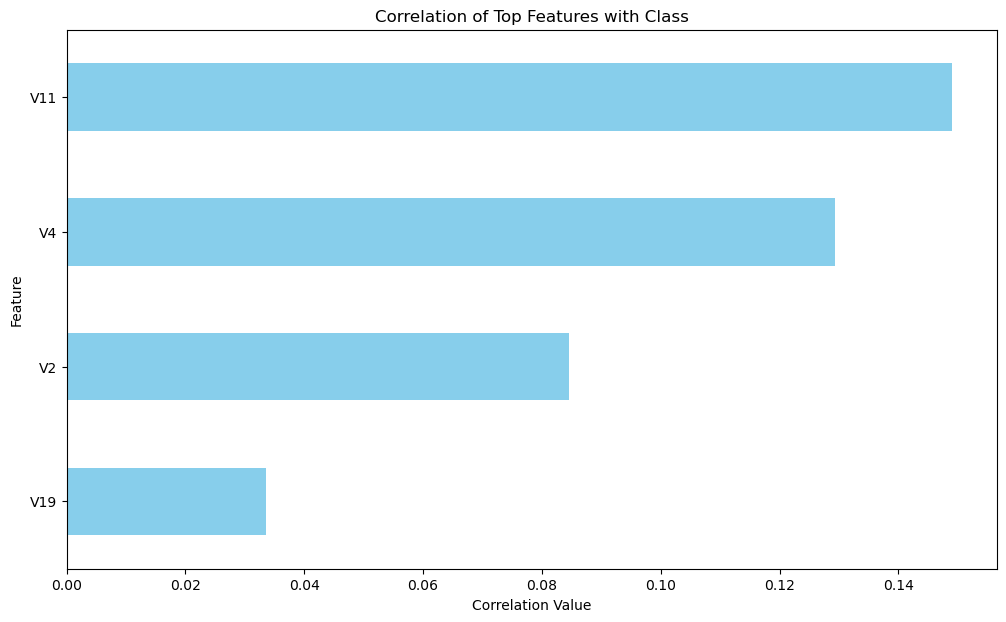

In [16]:
plot_top_correlated_features(df_modified, 'Time')
plot_top_correlated_features(df_modified, 'Amount')
plot_top_correlated_features(df_modified, 'Class')

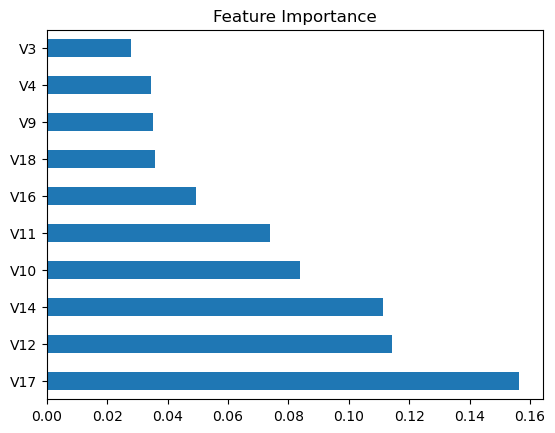

In [17]:
# Feature importance for class Time

from sklearn.ensemble import ExtraTreesClassifier

X = df_modified.iloc[:, :-1]
y = df_modified.iloc[:, -1]

model = ExtraTreesClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()




#### Amounts over time distributions 

C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\3398137149.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_modified['Time'], ax=ax[0], color='b', bins=600)
c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

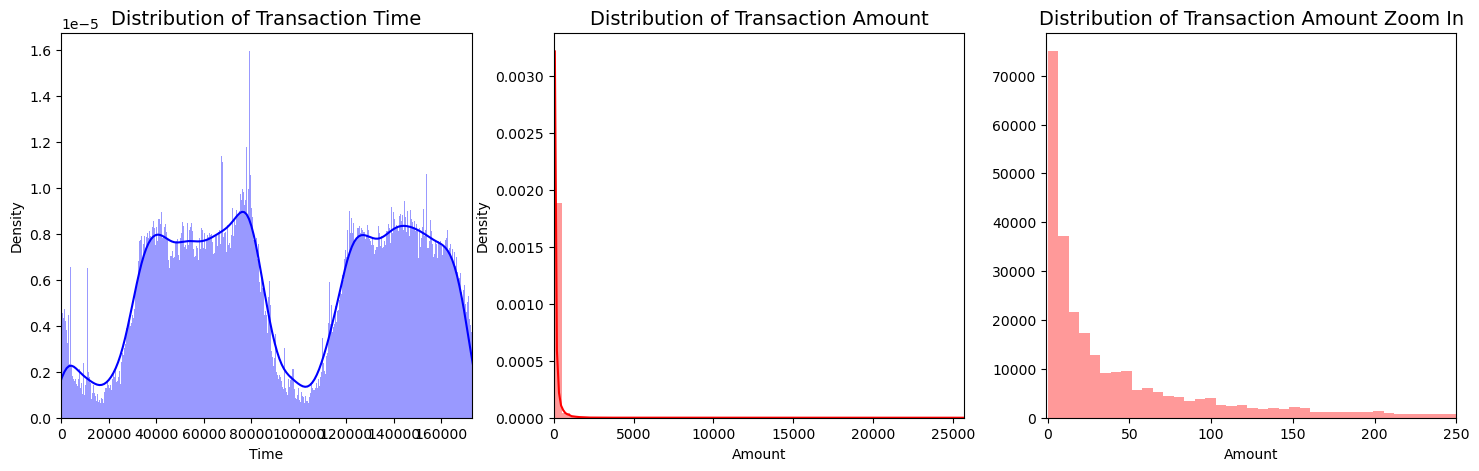

In [18]:
def distributions_over_time_plot(df_modified):
    # Plotting the distribution of 'Time' and 'Amount'
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    sns.distplot(df_modified['Time'], ax=ax[0], color='b', bins=600)   
    ax[0].set_title('Distribution of Transaction Time', fontsize=14)
    ax[0].set_xlim([min(df_modified['Time']), max(df_modified['Time'])])

    sns.distplot(df_modified['Amount'], ax=ax[1], color='r')
    ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
    ax[1].set_xlim([min(df_modified['Amount']), max(df_modified['Amount'])])

    sns.distplot(df['Amount'], ax=ax[2], color='r', bins=4000,  kde=False)
    ax[2].set_title('Distribution of Transaction Amount Zoom In', fontsize=14)
    ax[2].set_xlim([-1, 250])

    plt.show()

distributions_over_time_plot(df_modified)

#### Transaction (fraud and not) over time 

In [19]:
import plotly.figure_factory as ff
from plotly.offline import iplot
import numpy as np


class_0 = df_modified.loc[df_modified['Class'] == 0]["Time"]
class_1 = df_modified.loc[df_modified['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'), yaxis=dict(title='Density'))
iplot(fig, filename='dist_only')

C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\308477941.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\leo_b\anaconda3\envs\DSapplications\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\308477941.py:6: UserWarning:



`di

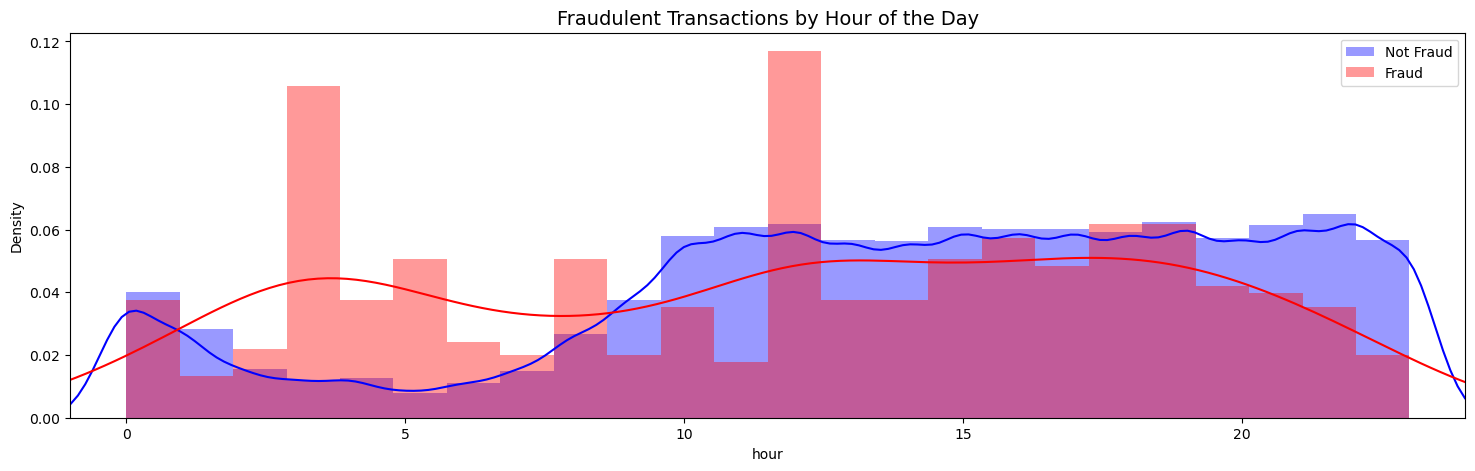

In [20]:
# Histogram based on the amount of money h by hour of the day
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

df_modified['hour'] = df_modified['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
sns.distplot(df_modified[df_modified['Class'] == 0]['hour'], bins=24, color='b', ax=ax, label='Not Fraud')
sns.distplot(df_modified[df_modified['Class'] == 1]['hour'], bins=24, color='r', ax=ax, label='Fraud')
ax.legend()
ax.set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
ax.set_xlim([-1, 24])
plt.show()


#### Transactions overview

In [21]:
def bins_incrementation(bin_inc):
    # Define the bins in increments of x
    bins = list(range(0, int(df_modified['Amount'].max()) + bin_inc, bin_inc))

    # Create a 'binned_amount' column in df_modified
    df_modified['binned_amount'] = pd.cut(df_modified['Amount'], bins)

    # For fraud cases
    fraud_counts = df_modified[df_modified['Class'] == 1]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in fraud_counts.index:
        fraud_counts[i] = fraud_counts[i]/sum(fraud_counts)*100
        
    # For non-fraud cases
    non_fraud_counts = df_modified[df_modified['Class'] == 0]['binned_amount'].value_counts().sort_values(ascending=False)
    for i in non_fraud_counts.index:
        non_fraud_counts[i] = non_fraud_counts[i]/sum(non_fraud_counts)*100

    return fraud_counts, non_fraud_counts

In [22]:
# Displaying the most common ranges in a plot
# do top 5



def top_amonts(df, _label):
    """Plot of top 5 percentage for amount transactions.

    Args:
        df_ (pd.DataFrame): percentage of rages
    """
    plt.figure(figsize=(12, 9))
    df.head(5).plot(kind='bar', figsize=(12, 9), color='g')
    # put pencentage on top of bars
    for index, value in enumerate(df.head(5)):
        plt.text(index, value + 0.5, str(round(value, 2))+'%')
    plt.xticks(rotation=90)
    plt.xlabel('Amount Range ($)')
    plt.ylabel('Percentage of Transactions')
    plt.title(f'Top 5 Frequency for {_label} Transactions')
    plt.show()


C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\1866274766.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '36.38392857142857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\1866274766.py:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16.30973105481934' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\1866274766.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '47.544642857142854' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\leo_b\AppData\Local\Temp\ipykernel_35108\1866274766.py:16: FutureWarning:

Setting an item of incompatible d

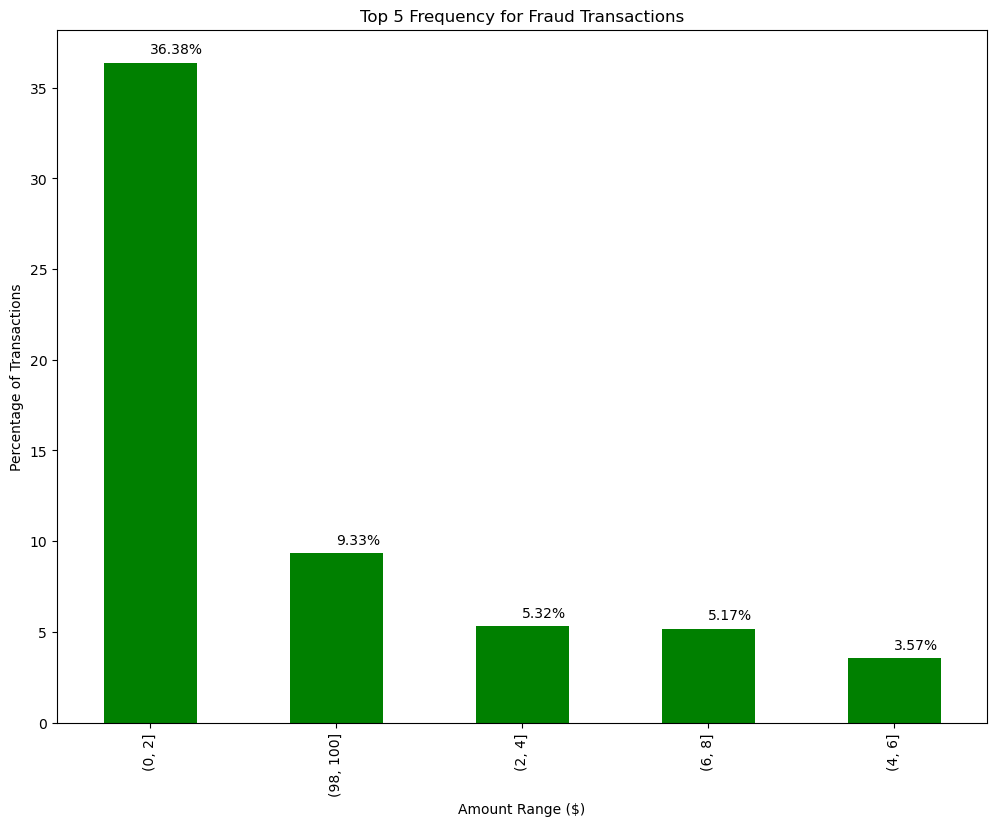

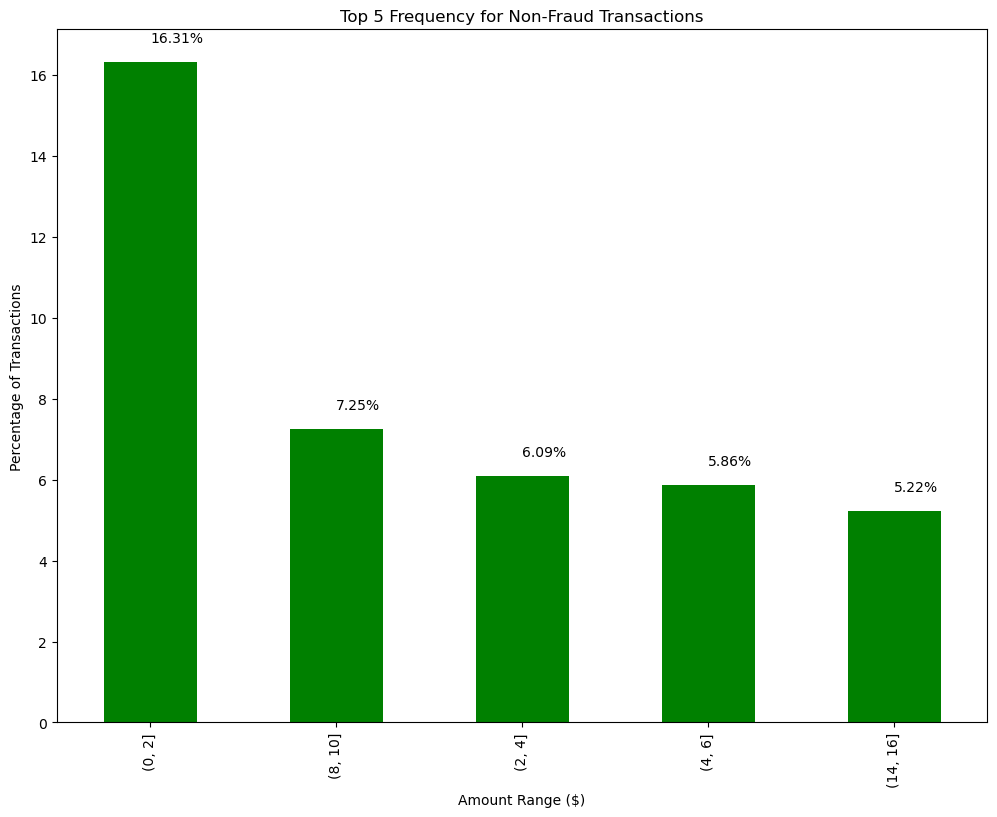

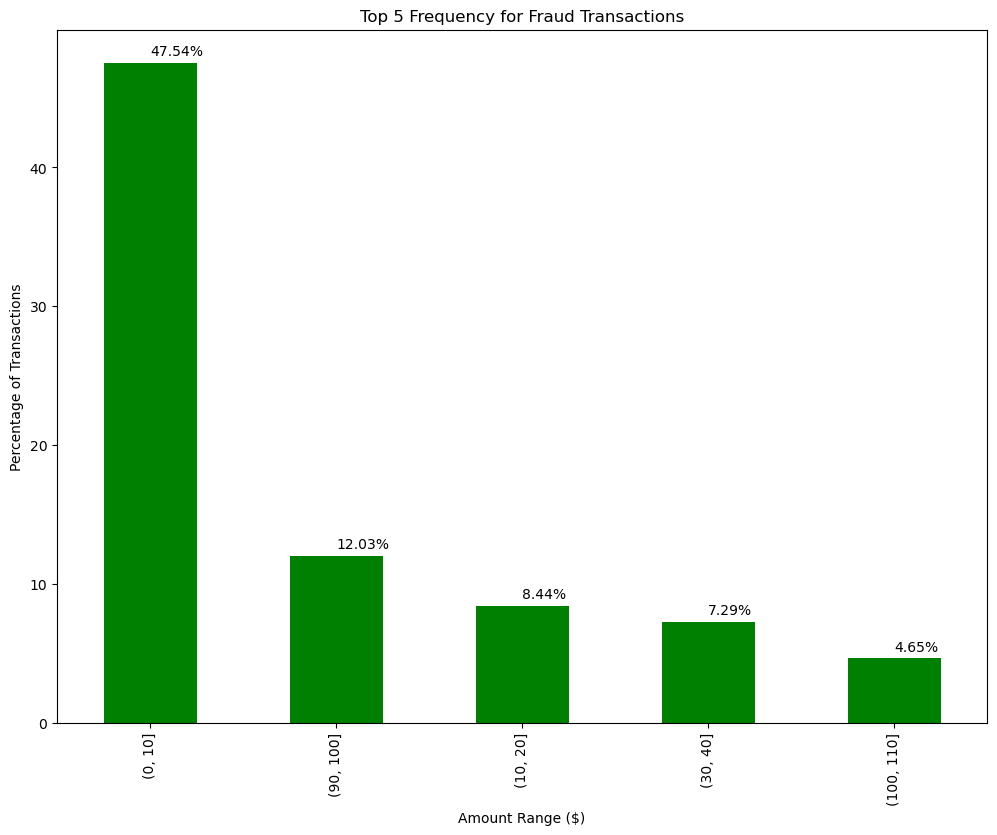

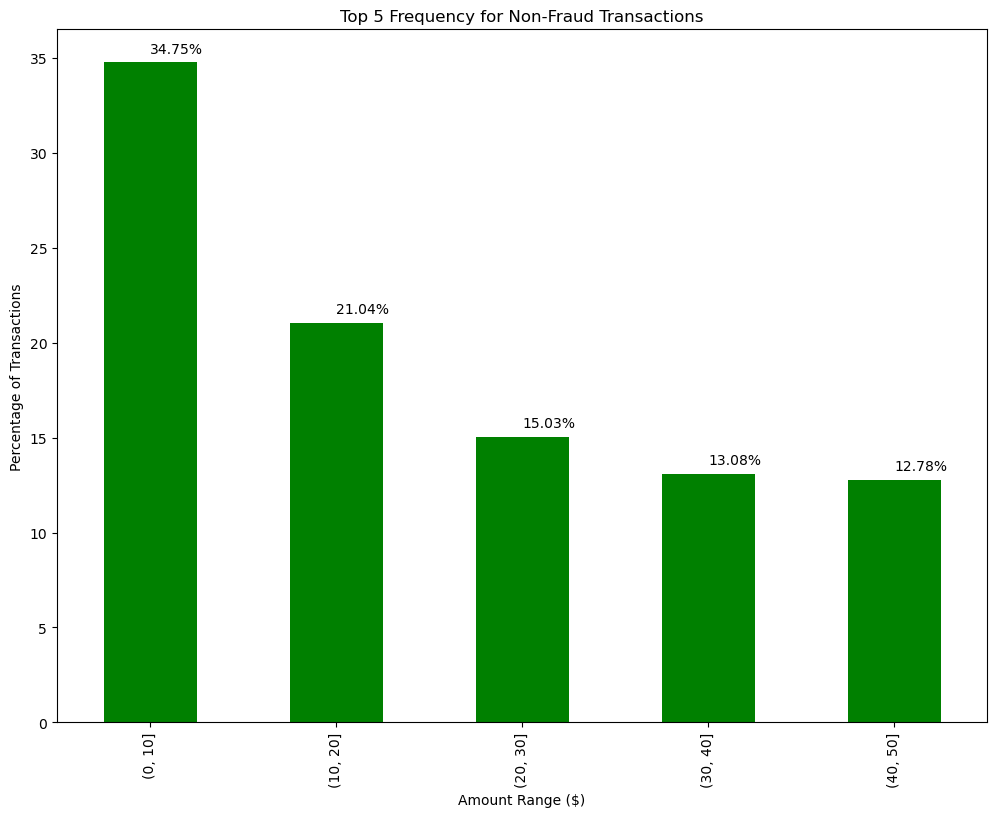

In [23]:
fraud_counts_2, non_fraud_counts_2 = bins_incrementation(2)
fraud_counts_10, non_fraud_counts_10 = bins_incrementation(10)

top_amonts(fraud_counts_2, 'Fraud')
top_amonts(non_fraud_counts_2, 'Non-Fraud')
top_amonts(fraud_counts_10, 'Fraud')
top_amonts(non_fraud_counts_10, 'Non-Fraud')

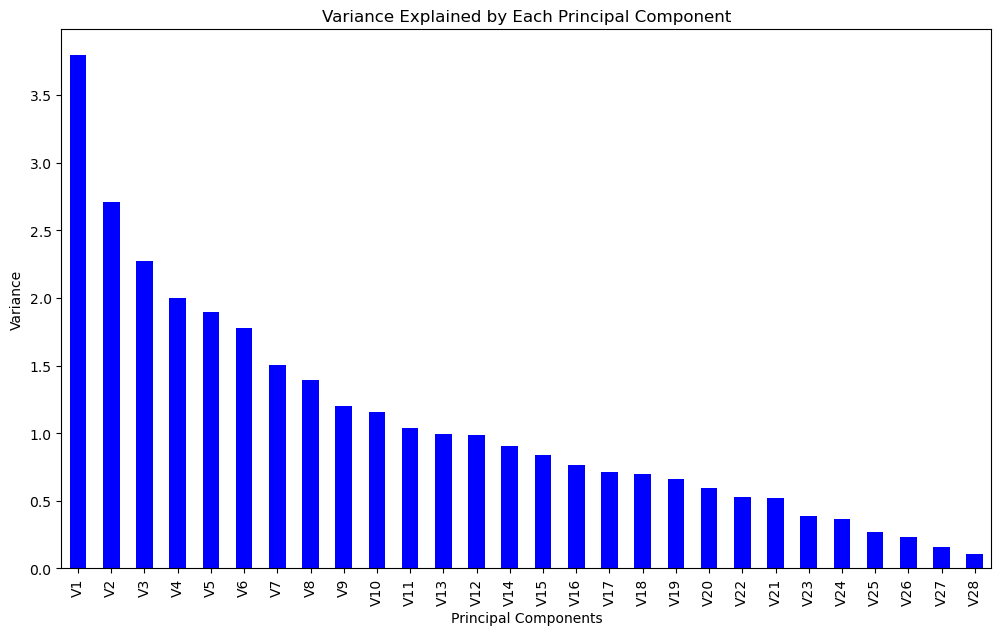

V1    3.794806
V2    2.711631
V3    2.276121
V4    1.999916
V5    1.896152
dtype: float64

In [24]:
#### Variation of the data

# Importing necessary libraries
import numpy as np

# Assuming the PCA-transformed features are named V1, V2, ... Vn
# Extracting only the PCA-transformed features
pca_columns = [col for col in df_modified.columns if 'V' in col]
pca_data = df_modified[pca_columns]

# Calculating the variance for each PCA feature
variances = pca_data.var()

# Sorting the variances in descending order to get top features
sorted_variances = variances.sort_values(ascending=False)

# Plotting the Scree plot
plt.figure(figsize=(12, 7))
sorted_variances.plot(kind='bar', color='blue')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.show()

# Extracting top 5 features with the most variance
top_5_features = sorted_variances.head(5)
top_5_features


#### Fit dist

In [25]:
"""
import scipy.stats as stats

def fit_distribution(data, dist_name):
    
    distribution = getattr(stats, dist_name)
    params = distribution.fit(data)
    return params

def plot_fit(data, dist_name, params):

    plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Data')
    
    # Generate the x values for the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Generate the PDF values using the fitted parameters
    fitted_data = getattr(stats, dist_name).pdf(x, *params)
    plt.plot(x, fitted_data, 'r-', label=dist_name)
    
    plt.title(f"Fit for {dist_name}")
    plt.legend()
    plt.show()

# Example: Fit a normal distribution to each feature in the dataset
for feature in df_modified.columns:
    data = df_modified[feature]
    params = fit_distribution(data, 'norm')
    plot_fit(data, 'norm', params)
"""

'\nimport scipy.stats as stats\n\ndef fit_distribution(data, dist_name):\n    \n    distribution = getattr(stats, dist_name)\n    params = distribution.fit(data)\n    return params\n\ndef plot_fit(data, dist_name, params):\n\n    plt.hist(data, bins=30, density=True, alpha=0.6, color=\'b\', label=\'Data\')\n    \n    # Generate the x values for the PDF\n    xmin, xmax = plt.xlim()\n    x = np.linspace(xmin, xmax, 100)\n    \n    # Generate the PDF values using the fitted parameters\n    fitted_data = getattr(stats, dist_name).pdf(x, *params)\n    plt.plot(x, fitted_data, \'r-\', label=dist_name)\n    \n    plt.title(f"Fit for {dist_name}")\n    plt.legend()\n    plt.show()\n\n# Example: Fit a normal distribution to each feature in the dataset\nfor feature in df_modified.columns:\n    data = df_modified[feature]\n    params = fit_distribution(data, \'norm\')\n    plot_fit(data, \'norm\', params)\n'

# Meeting 15/11

In [26]:
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_modified['Hour_Total'] = df_modified['Time'].apply(lambda x: np.floor(x / 3600))

In [27]:
tmp = df_modified.groupby(['Hour_Total', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['Hour_Total', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()

,Hour_Total,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597,17.985,45434.509936


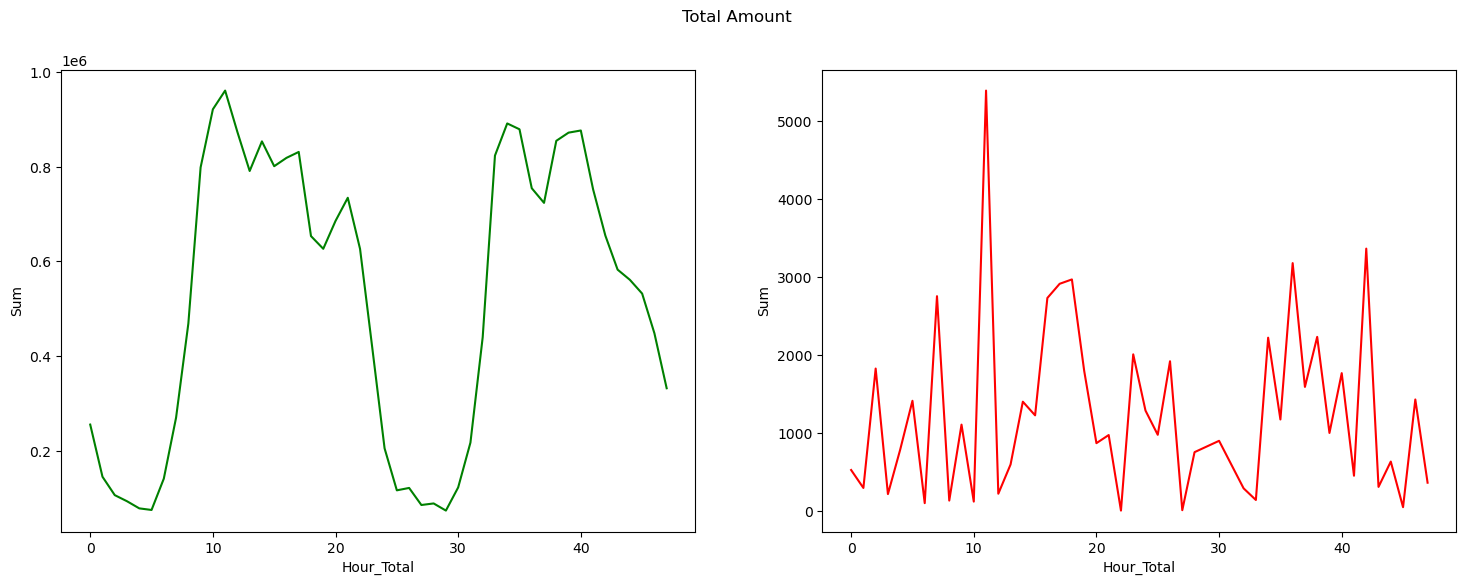

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour_Total", y="Sum", data=df_tmp.loc[df_tmp.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour_Total", y="Sum", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

# Intercept the data


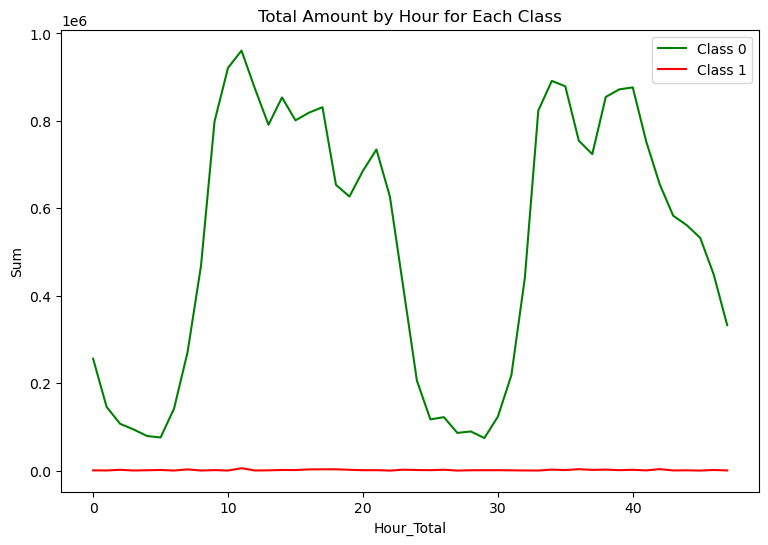

In [29]:
# Create a single plot
fig, ax = plt.subplots(figsize=(9,6))

# Plotting both classes on the same Axes object
sns.lineplot(ax=ax, x="Hour_Total", y="Sum", data=df_tmp.loc[df_tmp.Class==0], color="green", label="Class 0")
sns.lineplot(ax=ax, x="Hour_Total", y="Sum", data=df_tmp.loc[df_tmp.Class==1], color="red", label="Class 1")

# Setting title and showing the plot
ax.set_title("Total Amount by Hour for Each Class")
plt.legend()
plt.show()

ValueError: Could not interpret value `Hour` for parameter `x`

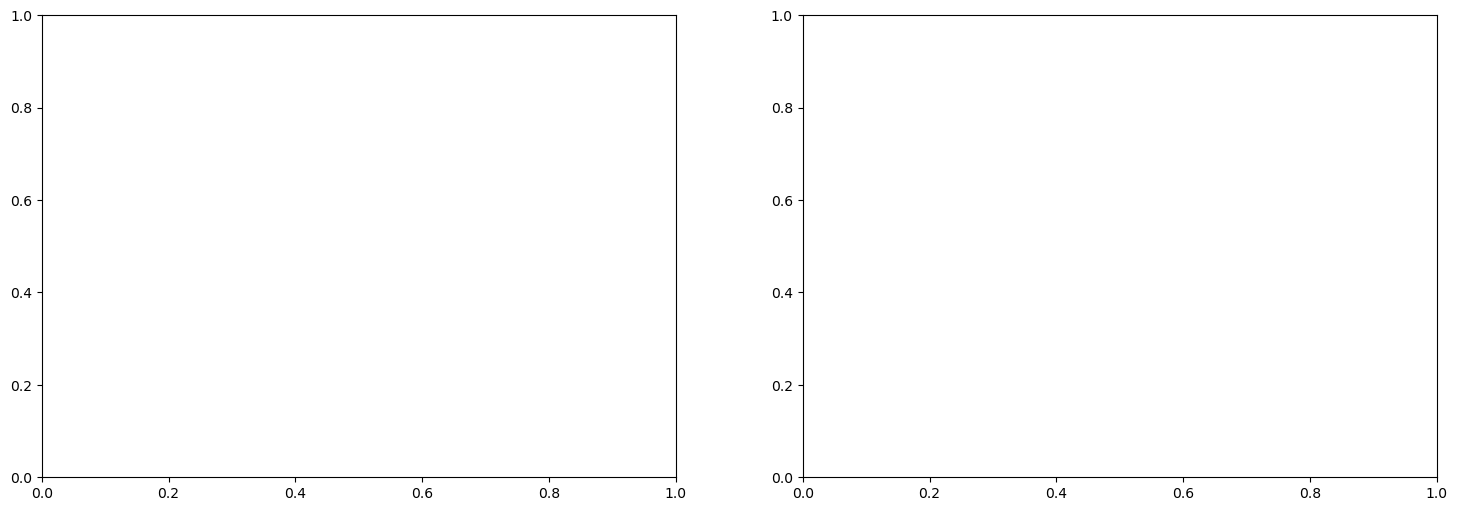

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

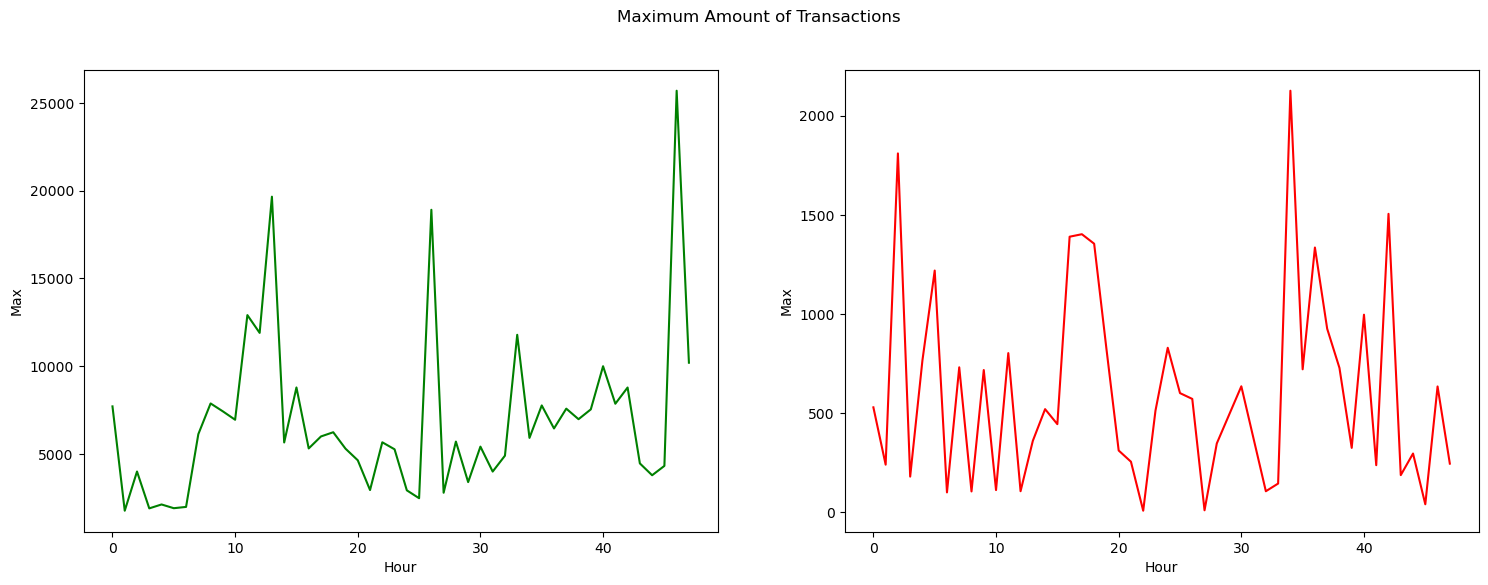

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

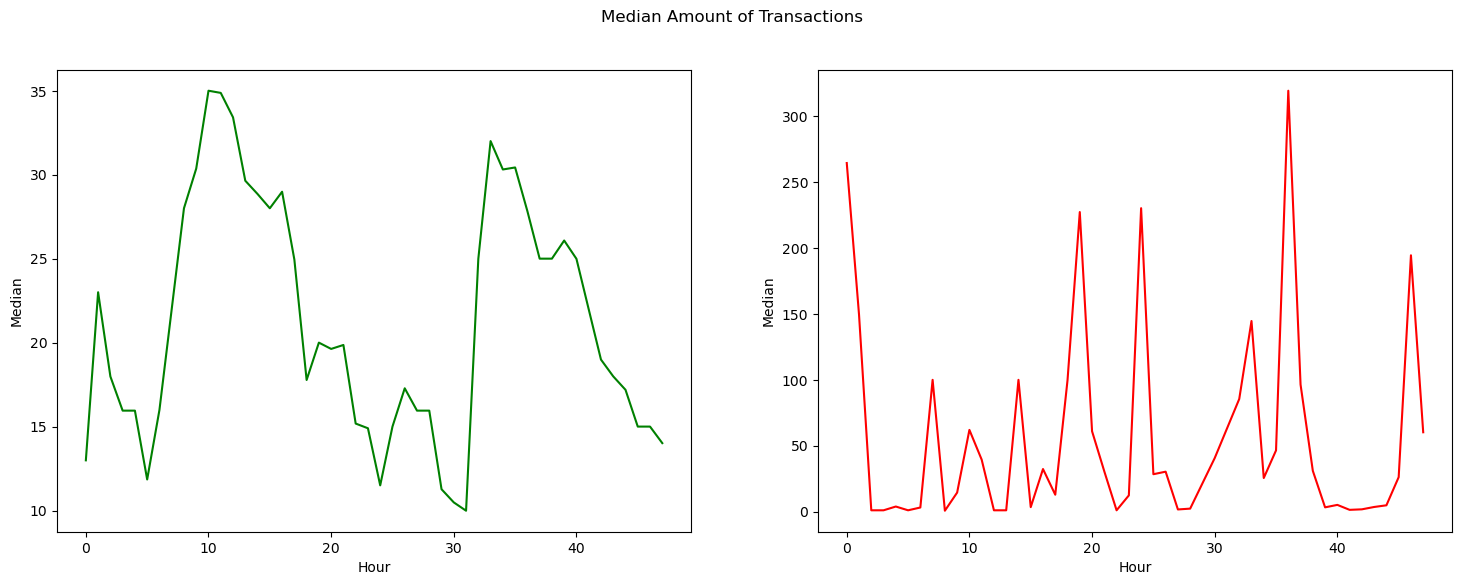

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

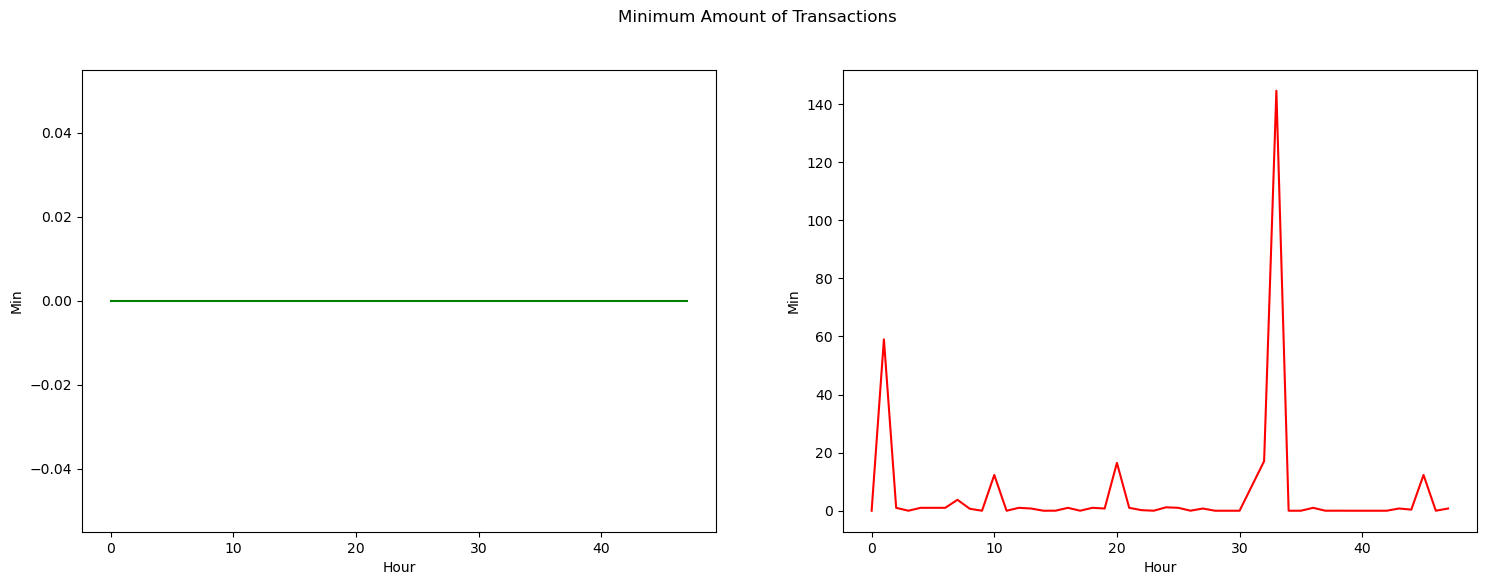

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 640x480 with 0 Axes>

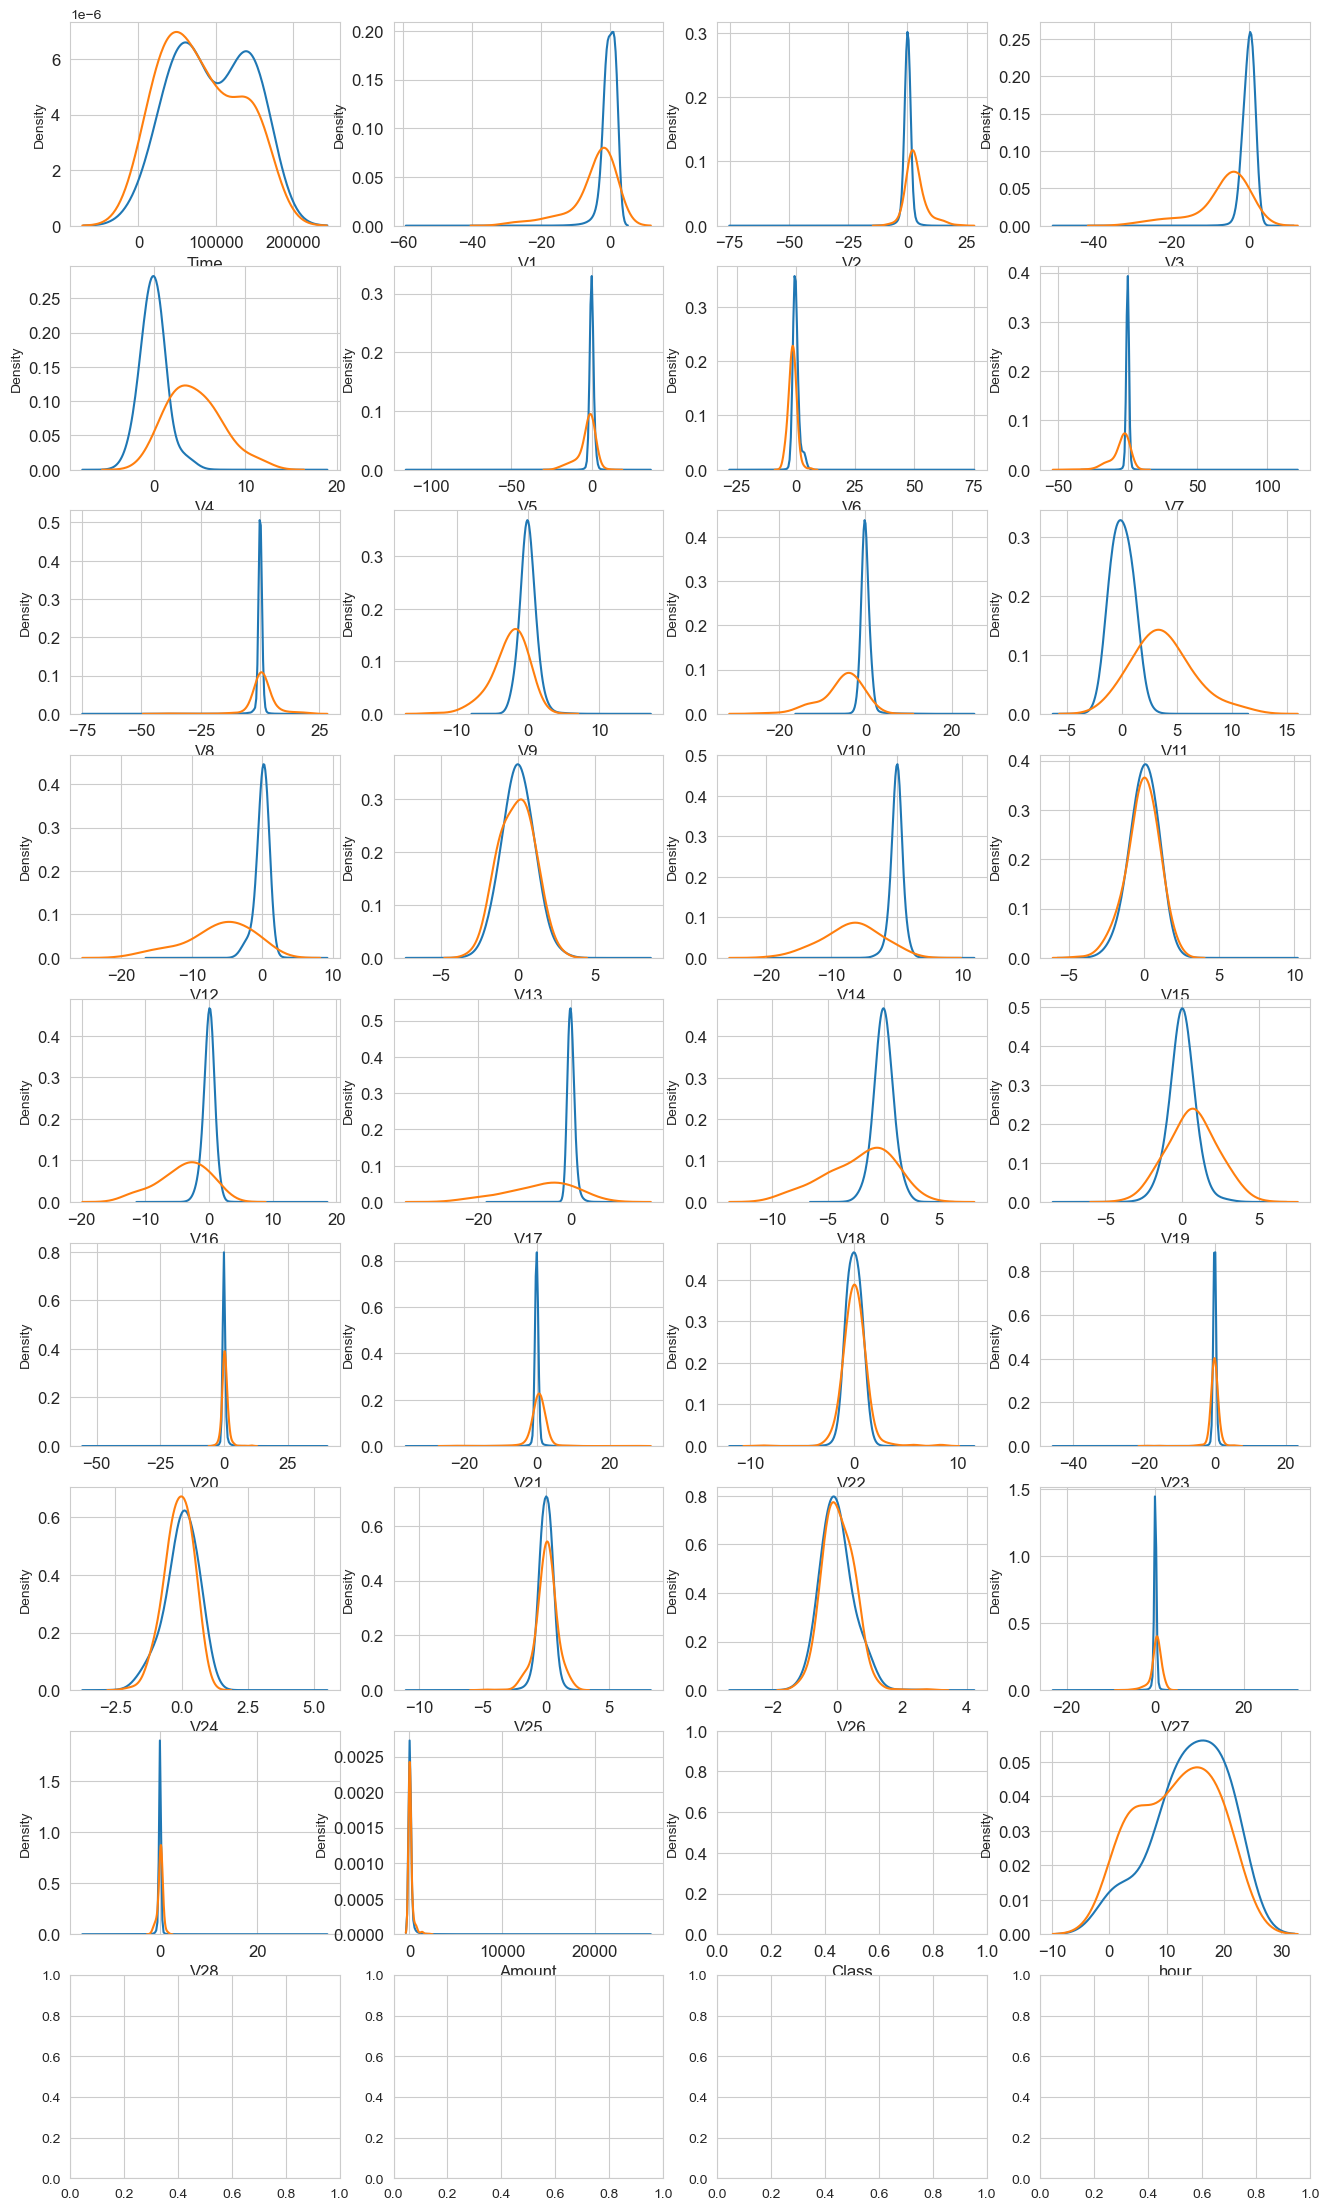

In [31]:
# Ignore UserWarnings
warnings.simplefilter(action='ignore', category=UserWarning)

var = df_modified.columns.values

i = 0
t0 = df_modified.loc[df_modified['Class'] == 0]
t1 = df_modified.loc[df_modified['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(9,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(9,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

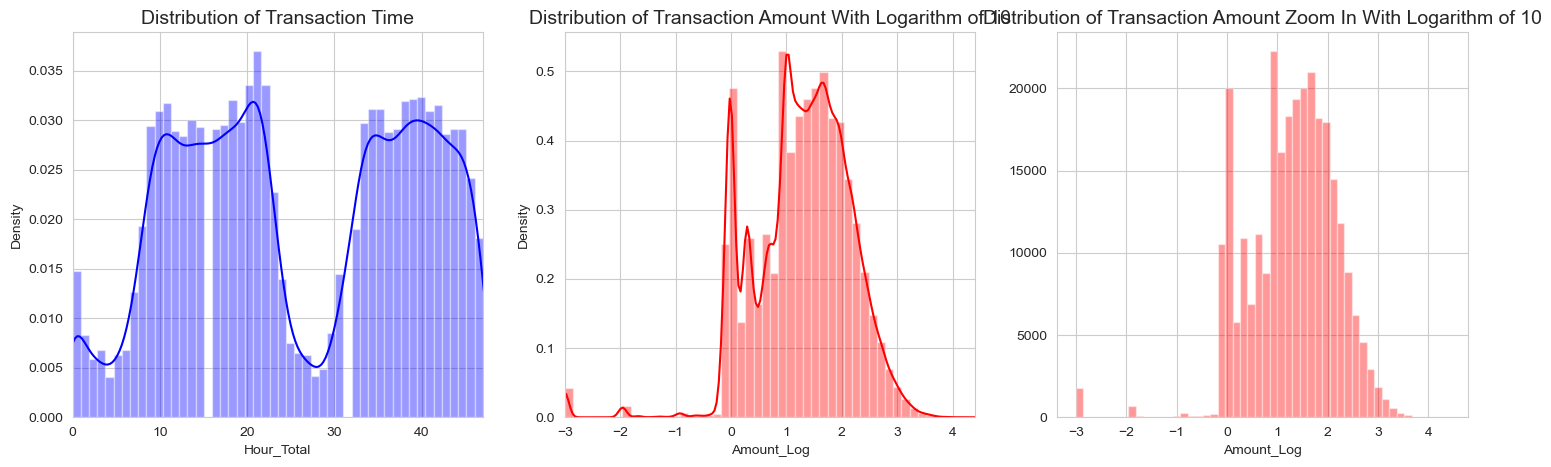

In [ ]:
# Apply logarithm of 10 to the amount of money
df_modified['Amount_Log'] = np.log10(df_modified.Amount + 0.001) 

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.distplot(df_modified['Hour_Total'], ax=ax[0], color='b')   
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df_modified['Hour_Total']), max(df_modified['Hour_Total'])])

sns.distplot(df_modified['Amount_Log'], ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Amount With Logarithm of 10', fontsize=14)
ax[1].set_xlim([min(df_modified['Amount_Log']), max(df_modified['Amount_Log'])])

sns.distplot(df_modified['Amount_Log'], ax=ax[2], color='r',  kde=False)
ax[2].set_title('Distribution of Transaction Amount Zoom In With Logarithm of 10', fontsize=14)
#ax[2].set_xlim([-1, 250])

plt.show()

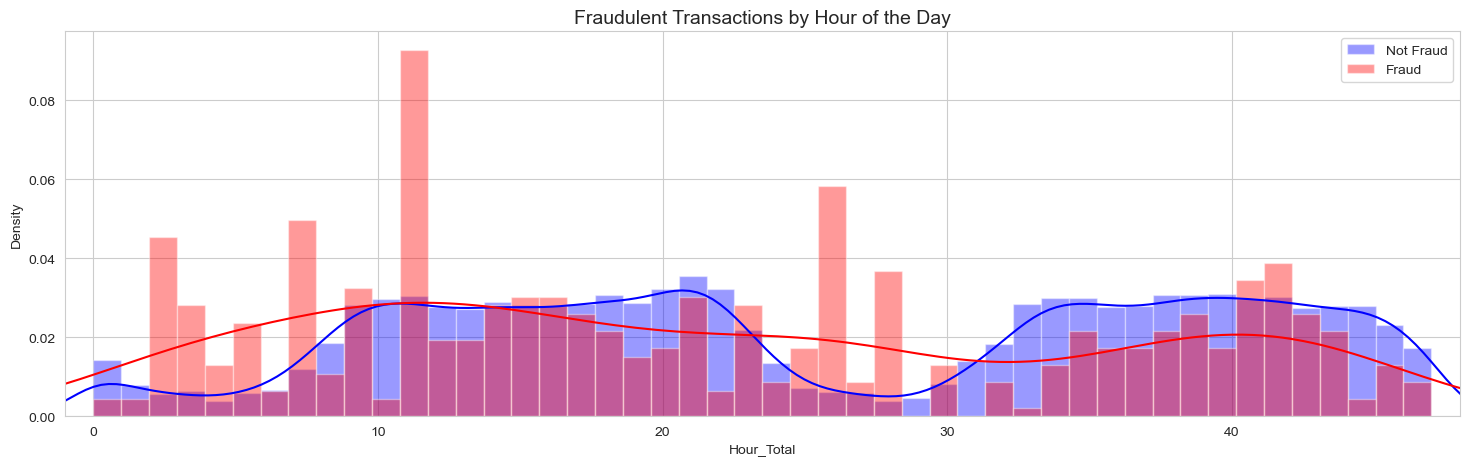

In [ ]:
# Histogram based on the amount of money h by hour of the day
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

#df_modified['hour'] = df_modified['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
sns.distplot(df_modified[df_modified['Class'] == 0]['Hour_Total'], bins=48, color='b', ax=ax, label='Not Fraud')
sns.distplot(df_modified[df_modified['Class'] == 1]['Hour_Total'], bins=48, color='r', ax=ax, label='Fraud')
ax.legend()
ax.set_title('Fraudulent Transactions by Hour of the Day', fontsize=14)
ax.set_xlim([-1, 48])
plt.show()

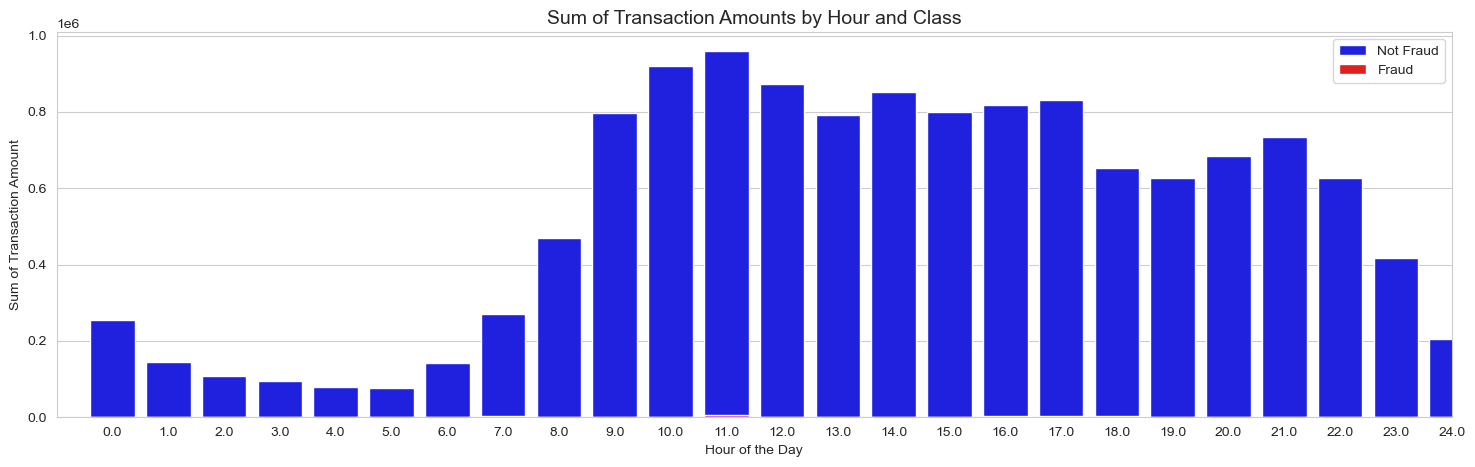

In [ ]:
grouped_data = df_modified.groupby(['Hour_Total', 'Class'])['Amount'].sum().reset_index()

# Separate the data for each class
not_fraud = grouped_data[grouped_data['Class'] == 0]
fraud = grouped_data[grouped_data['Class'] == 1]

# Create a histogram plot
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

sns.barplot(x='Hour_Total', y='Amount', data=not_fraud, color='b', ax=ax, label='Not Fraud')
sns.barplot(x='Hour_Total', y='Amount', data=fraud, color='r', ax=ax, label='Fraud')

ax.legend()
ax.set_title('Sum of Transaction Amounts by Hour and Class', fontsize=14)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Sum of Transaction Amount')
ax.set_xlim([-1, 24])  # Adjust the x-axis limit to the actual range of hours (0 to 23)

plt.show()

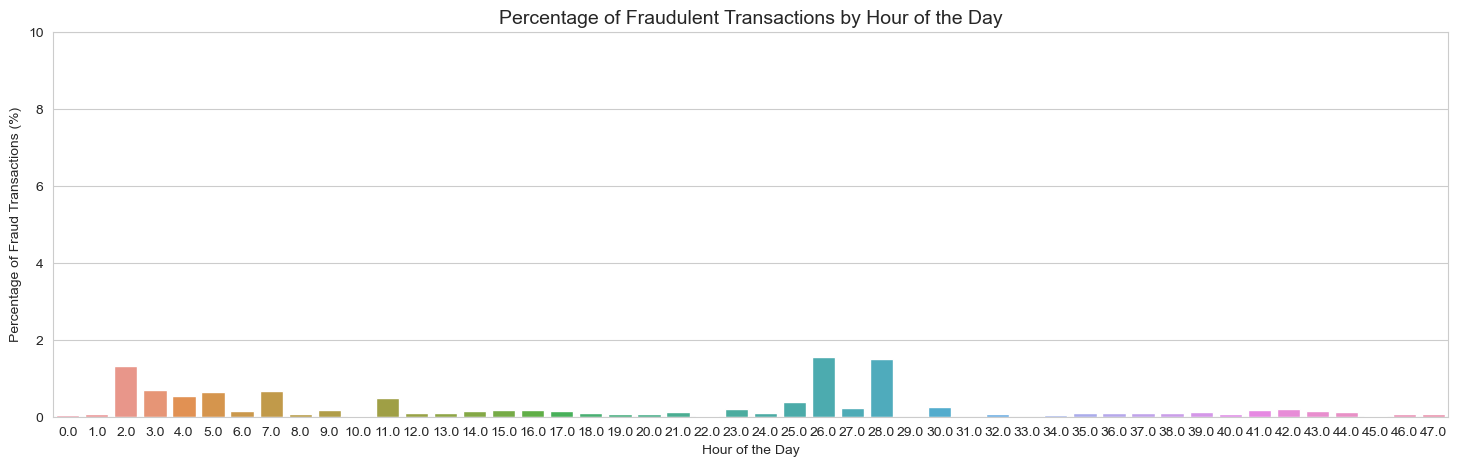

In [ ]:
# Filter out transactions where the amount is zero
#zero_amount = df_modified[df_modified['Amount'] == 0]
#print()

# Group by 'Hour_Total' and calculate the percentage of fraud transactions
fraud_percentage_by_hour = df_modified.groupby('Hour_Total')['Class'].mean() * 100

# Reset index to turn it into a DataFrame
fraud_percentage_by_hour = fraud_percentage_by_hour.reset_index()

# Plotting
plt.figure(figsize=(18, 5))
sns.barplot(x='Hour_Total', y='Class', data=fraud_percentage_by_hour)

plt.title('Percentage of Fraudulent Transactions by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Fraud Transactions (%)')
plt.ylim(0, 10)  # Set y-axis to range from 0 to 100 for percentage

plt.show()


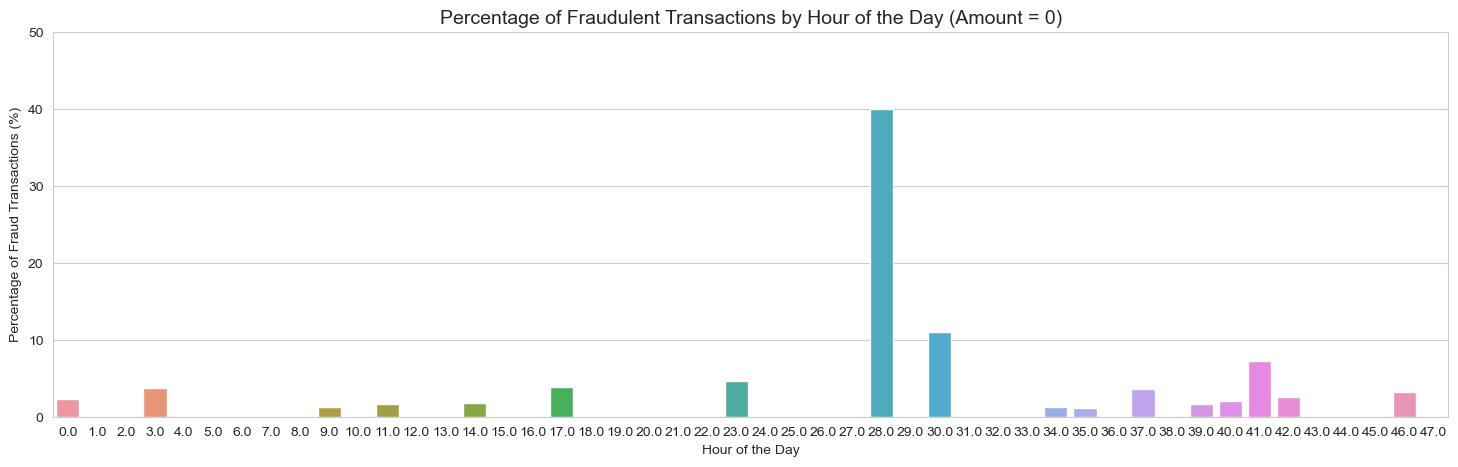

In [ ]:
# Filter out transactions where the amount is zero
zero_amount = df_modified[df_modified['Amount'] == 0]


# Group by 'Hour_Total' and calculate the percentage of fraud transactions
fraud_percentage_by_hour = zero_amount.groupby('Hour_Total')['Class'].mean() * 100

# Reset index to turn it into a DataFrame
fraud_percentage_by_hour = fraud_percentage_by_hour.reset_index()

# Plotting
plt.figure(figsize=(18, 5))
sns.barplot(x='Hour_Total', y='Class', data=fraud_percentage_by_hour)

plt.title('Percentage of Fraudulent Transactions by Hour of the Day (Amount = 0)', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Fraud Transactions (%)')
plt.ylim(0, 50)  # Set y-axis to range from 0 to 100 for percentage

plt.show()


In [ ]:
import pandas as pd

# Assuming df_modified is your DataFrame and it contains 'Class' and 'Amount' columns

# Filter out transactions where the amount is zero
zero_amount = df_modified[df_modified['Amount'] == 0]

# Calculate the percentage of these transactions that are fraud
percentage_fraud = ((zero_amount['Class'] == 1).mean() * 100)

print(f"Percentage of Fraudulent Transactions with Amount 0: {percentage_fraud:.2f}%")


Percentage of Fraudulent Transactions with Amount 0: 1.38%


### Outliers

#### Interquartile Range Method

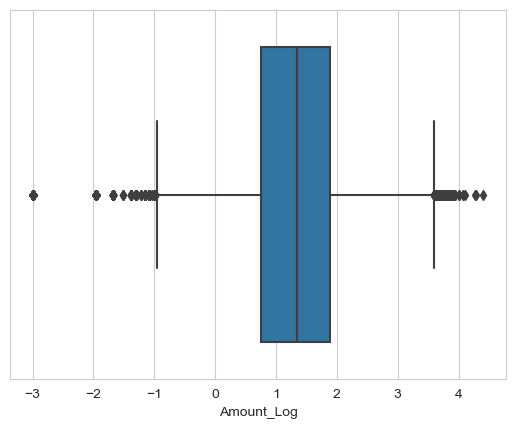

In [ ]:
# Discover outliers in the dataset 

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset is df_modified

# Interquartile range to dataset with boxplot
sns.boxplot(x=df_modified['Amount_Log'])
plt.show()



In [ ]:
# Calculate the 25th and 75th percentile of the 'Amount_Log' column
q25, q75 = np.percentile(df_modified['Amount_Log'], 25), np.percentile(df_modified['Amount_Log'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# Select observations outside the interquartile range
outliers_df = df_modified[(df_modified['Amount_Log'] < lower) | (df_modified['Amount_Log'] > upper)]

print('Identified outliers: %d' % len(outliers_df))

# Now outliers_df contains the full observations for the outliers


Identified outliers: 2854


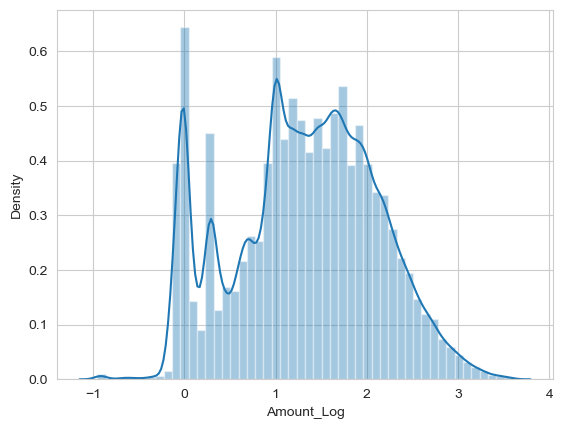

In [ ]:
# Remove outliers from the dataset
df_modified_with_outliers = df_modified['Amount_Log'] 
df_modified = df_modified[(df_modified['Amount_Log'] > lower) & (df_modified['Amount_Log'] < upper)]

# Check the distribution of the 'Amount_Log' column
sns.distplot(df_modified['Amount_Log'])
plt.show()



In [ ]:
# Remove Time, Amount, binned_amount and Hour_Total columns
df_for_preddictions = df_modified.drop(['Time', 'Amount', 'binned_amount', 'Hour_Total'], axis=1)

In [ ]:
"""
# supervised SVM,  random forest, feed-forward NN

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df_for_preddictions.drop('Class', axis=1)
y = df_for_preddictions['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predicting using a supervised SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create a classifier object
clf = SVC(kernel='linear')

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}%')
print(classification_report(y_test, y_pred))


"""

In [ ]:
"""# Same but for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a classifier object

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)

# Make predictions on the test set

y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}%')
print(classification_report(y_test, y_pred))

"""

In [ ]:
"""# Same but for Forward NN
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Create a classifier object
model = Sequential()

# Add layers to the model
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, verbose=0)

# Make predictions on the test set
y_pred = model.predict_classes(X_test)

# Print the accuracy and classification report
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}%')
print(classification_report(y_test, y_pred))

"""